In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.averager as averager
import mlgrad.gd as gd
import mlgrad.pbfg as pbfg

import sklearn.linear_model as sklm

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/phones.dat", sep=' ', names=["year", "calls"])
#df

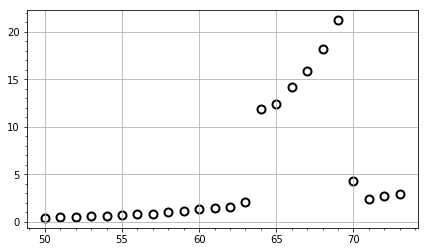

In [3]:
plt.figure(figsize=(7.0, 4.0))
plt.scatter(df["year"], df["calls"], s=64, marker='o', c='w', edgecolors='k', linewidths=2., label='data')
plt.minorticks_on()
plt.grid(1)
plt.show()

In [4]:
X = df["year"].values.reshape((-1,1))
X = np.asarray(X, "d") - 50.
Y = df["calls"].values

In [13]:
loss_func = loss.ErrorLoss(func.Square())
loss_func

In [14]:
penalty_func = func.Quantile_AlphaLog(0.001, 0.5)
penalty_func

In [15]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

avrfunc = avragg.Average_FG(penalty_func, h=0.01, tol=1.0e-5)
fg = gd.FG(lm_learn, loss_func, h=0.01, tol=1.0e-5)
#fg.use_gradient_averager(averager.ArrayAdaM1())
alg = pbfg.PbFG(avrfunc, fg, tol=1.0e-4)
alg.fit(X, Y)
print("M:", alg.K, "K:", fg.K, lm_learn.param.base)

M: 52 K: 2 [ 0.10604779  0.14142701]


In [16]:
lm_learn

In [17]:
param_init2 = np.random.random((2,))
lm_learn2 = model.LinearModel(param_init2)

alg2 = gd.FG(lm_learn2, loss_func, h=0.01)
#alg2.use_gradient_averager(averager.ArrayAdaM1())
alg2.fit(X, Y)
print("K:", alg2.K)

K: 423


In [18]:
lm_learn2

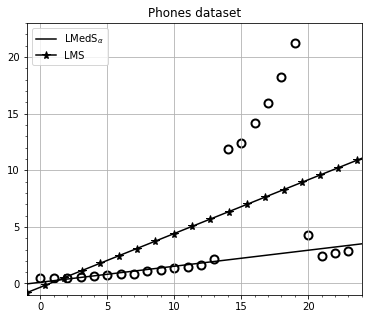

In [19]:
plt.figure(figsize=(6.0, 5.0))
X0 = np.linspace(-1, 25, 20)
plt.title('Phones dataset')
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidths=2.)
plt.plot(X0, lm_learn.evaluate_all(X0.reshape(-1,1)), c='k', label=r'LMedS$_\alpha$')
plt.plot(X0, lm_learn2.evaluate_all(X0.reshape(-1,1)), marker='*', markersize=8, c='k', label='LMS')
plt.minorticks_on()
plt.grid(1)
plt.legend(loc='upper left')
plt.ylim(-1,23)
plt.xlim(-1,24)
plt.show()